In [1]:
import pandas as pd
from math import sqrt

In [8]:
oyuncular = {"boy" : [175,178,177,181,182,183,184,188,190], "deneyim": [4,6,3,2,6,3,7,2,6], "maas" : [12,18,15,16,24,20,28,24,32]}
df = pd.DataFrame(oyuncular)
df

,boy,deneyim,maas
0,175,4,12
1,178,6,18
2,177,3,15
3,181,2,16
4,182,6,24
5,183,3,20
6,184,7,28
7,188,2,24
8,190,6,32


- **Burada çeşitli filtrelemeler ile datayı böleceğiz amacımız ise error'u düşürmek**
- **Her bir filtrede örneğin maaşlardan maaş ortalamasını çıkarıp karelerini toplayacağız bu bize varyansı verecek**
- **Varyansın düşük olması aynı zamanda error'un da azalması anlamına geliyor. Amacımız en düşük error'a ulaşmak**
- **Düşük error'a ulaştığımız mantık bizim modelimizi eğitmemiz için hangi sorulardan başlayacağımızı bize gösterecek**

In [9]:
df.maas.mean()

21.0

<h1>Filtreleme yapmadan ilk modelimiz şöyle duracak</h1>

In [11]:
((df.maas)- (df.maas.mean())).pow(2).sum() #filtreleme yapmadan ulaştığımız error 340

340.0

-**İLK FİLTRELEME**

In [14]:
filt = (df.boy <= 180)
df1 = df[filt] #boyu 180cmden kısa olanlar için df1
df2 = df[~filt] #uzun olanlar içi

,boy,deneyim,maas
3,181,2,16
4,182,6,24
5,183,3,20
6,184,7,28
7,188,2,24
8,190,6,32


<h1>İlk filtreleme için hesaplama</h1>

In [16]:
((df1.maas)-(df1.maas.mean())).pow(2).sum() + ((df2.maas)-(df2.maas.mean())).pow(2).sum()

178.0

-**Filtreleme sonrası error düşmüş oldu. Daha çok filtreleme yaparak error'u düşürmeliyiz**

<h1>İkinci filtreleme</h1>

In [26]:
filt2 = (df2.boy <= 185)
df3 = df2[filt2] #180cmdden uzun olanlar için boyu 185cmden kısa olanlar için df3. Çünkü df2'yi dallandırıyoruz şu an
df4 = df2[~filt2] #180cmden uzun olanlar için 185den de uzun olanlar için df4 oluşturuldu.
#Boy konusunda daha spesifik bir dallandırma yapmış olduk.

,boy,deneyim,maas
3,181,2,16
4,182,6,24
5,183,3,20
6,184,7,28


In [24]:
((df1.maas)-(df1.maas.mean())).pow(2).sum() + ((df3.maas)-(df3.maas.mean())).pow(2).sum() + ((df4.maas)-(df4.maas.mean())).pow(2).sum()

130.0

-**Artık df2'yi katmıyoruz çünkü df2 zaten 2ye bölündü.**

<h1>Üçüncü Filtreleme</h1>

-**Şimdi 180 ile 185 arasındakiler için yeni bir parametre ile filtreleme yapıcaz. Bu sefer deneyimi işin içine katıyoruz**

In [29]:
filt3 = (df3.deneyim <= 5)
df5 = df3[filt3] #180-185 aralığında 5 yıllık deneyimden az kişiler
df6 = df3[~filt3] #180-185 aralığında 5 yıllık deneyimden fazla kişiler

-**df1,4,5,6 için hesaplamaya geçeceğiz. 180den uzun 185 den kısa 5 yıldan az ve fazla olmak üzere 4 grubun varyansını hesaplayacağız**

In [31]:
print(df1)
print(df4)
print(df5)
print(df6)

   boy  deneyim  maas
0  175        4    12
1  178        6    18
2  177        3    15
   boy  deneyim  maas
7  188        2    24
8  190        6    32
   boy  deneyim  maas
3  181        2    16
5  183        3    20
   boy  deneyim  maas
4  182        6    24
6  184        7    28


-**Sorgumuzda hem 180den kısa hem 180den uzun ama 185den kısa hem de 180-185 arasında 5 yıldan az ve fazla deneyimi olan veriler var**
-**Bu sorguları yaparak error'umuzu düşürdük. Bu da bize modeli eğitmek için nerelerden başlamamız gerektiğini söyledi**

In [33]:
((df1.maas)-(df1.maas.mean())).pow(2).sum() + ((df4.maas)-(df4.maas.mean())).pow(2).sum() + ((df5.maas)-(df5.maas.mean())).pow(2).sum() + ((df6.maas)-(df6.maas.mean())).pow(2).sum()

66.0

-**Error'umuz daha da düşmüş oldu**

<h1>Sonuç Olarak</h1>

Decision tree veya diğer makine öğrenimi algoritmalarını kullanırken, veri setinizin özelliklerine göre farklı alt gruplara ayırarak bu gruplardaki değişkenliği incelemek, hangi algoritmanın veya modelin en uygun olduğunu belirlemede bize yardımcı olabilir. Örneğin, maaşların varyansı büyük ölçüde değişiyorsa, daha esnek bir modelin kullanılması gerekebilir.

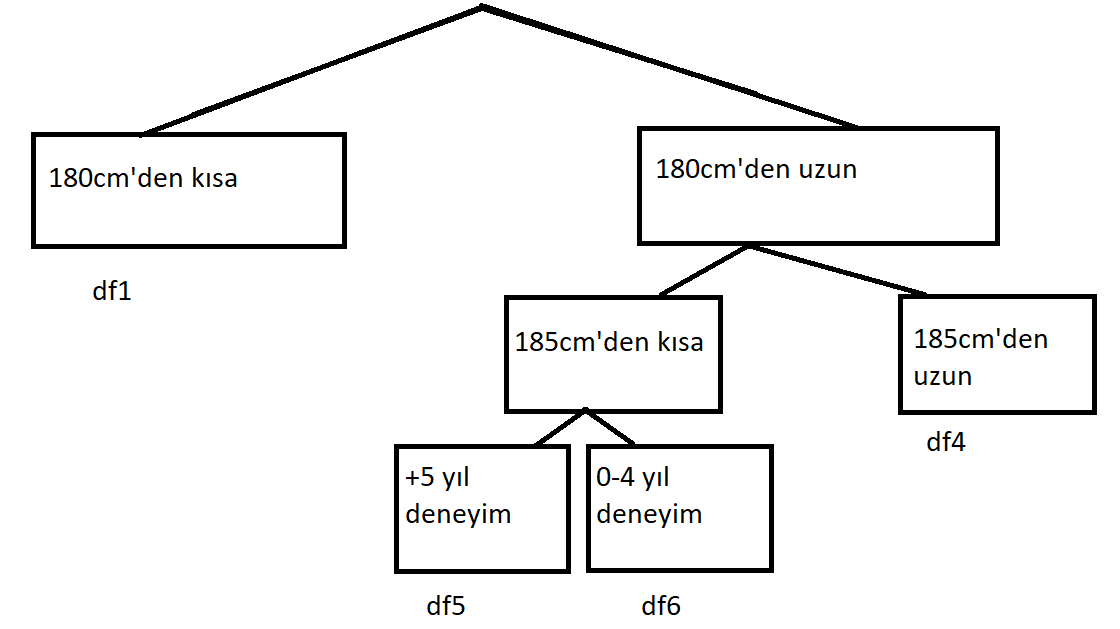